# Something

In [16]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


In [17]:
###To start, set the path to open your image. In this example the image bands are in a folder called "Image" in the 
###working directory. B* means that the script will read in all band tifs collectively rather than having to code each one.
image_path = glob("Image\LC08_L1TP_207023_20211122_20211130_01_T1_B*.tif")
###Ensure the bands are sorted in order
image_path.sort()
###Stack the bands into a single image. Give the no data values. WHY? WHAT IS META? ARR_ST?
image, meta = es.stack(image_path, nodata=-9999)



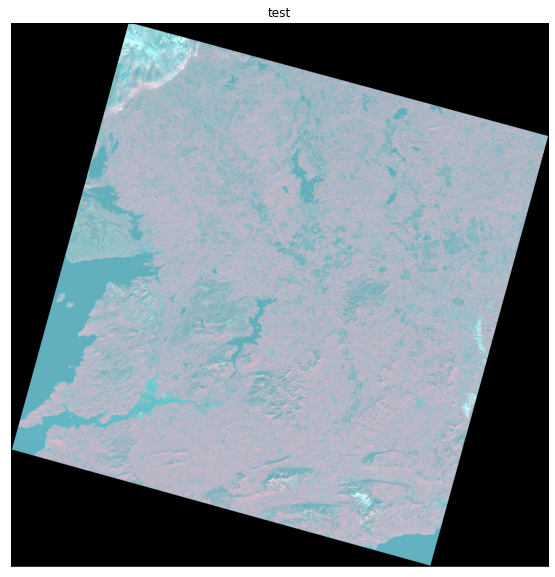

<AxesSubplot:title={'center':'test'}>

In [19]:
###plot your image. Default plot below is the false colour composite (4, 3, 2,) but these can be changed. Str_clip will 
###impact the amount of image stretch applied.
ep.plot_rgb(image, rgb = [4, 3, 2], title = "test", stretch=True, str_clip=0.1)

In [ ]:
###define the key variables for the function, below.
###note that image is defined above
ndvi_plot_title = ["Your ndvi plot name"]
cmap = "RdYlGn"
vmin = -1
vmax = 1

#and for the classification
ndvi_classes = [-np.inf, 0, 0.15, 0.3, 0.5, np.inf]
ndvi_colours = ["blue", "green", "yellow", "red", "pink"]
ndvi_class_names = ["one", "two", "three", "four", "five"]
classification_plot_title = ["Your classification plot name"]

In [20]:
###Function to calculate the ndvi based on the image that you open and stack, above.
###If using Landsat 4-7 this is calculated using bands 4 and 3, which equate to [3] and [2]. Change this below if using 
###such satellites. 
def ndvi (image):
    ###Here we define the two bands used to calculate the NDVI: red band and near infrared (NIR) band
    ###These are changed to floats AND WHY IS THAT?
    red = image[3].astype(float)
    nir = image[4].astype(float)
    
    ###and calculate the ndvi using the formula and numpy's divide function
    my_ndvi = np.divide((nir-red), (nir+red))
    
    #give your plot a name
    plot_title = ["My plot name"]
    
    ###Depending on your area of interest you might like to change vmin and vmax. 
    ###If, for example, your values range from -0.3 to 0.4, try using e.g. -0.4 and 0.5 as vmin/vmax to get a clearer 
    ###idea of the actual spread of NDVI values. As NDVI values can mathematically range from -1 to 1 these are used as 
    ###default vmin/vmax.
    ###Feel free to change the colour map, too. RdYlGn (continuous scale of red -> green) is a commonly used one 
    ###with NDVI's, where darker greens represent healthier vegetation. 
    ###Choose more here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ep.plot_bands(my_ndvi, cmap = "RdYlGn", title = plot_title, vmin = -1, vmax = 1)
    
    ###and create the classes you want on your ndvi. Edit these as you please. -np.inf and np.inf will take the negative
    ###and positive extremities. This will create 5 classes, but you can add more (just remember to assign them a colour below)
    ndvi_classes = [-np.inf, 0, 0.15, 0.3, 0.5, np.inf]
    ###Below we take the output array for our ndvi calculated above and give each value the integer value of the 
    ###class it falls into
    image_ndvi_class = np.digitize(my_ndvi, ndvi_classes)
    ### Apply a 'no data' mask to the array. This will remove no value data entries
    image_ndvi_class = np.ma.masked_where(np.ma.getmask(my_ndvi), image_ndvi_class)
    np.unique(image_ndvi_class)
    
    ###define colour map and class names
    ###turn colours list into a colourmap (cmp) to read into imshow, below.
    ndvi_colours = ["blue", "green", "yellow", "red", "pink"]
    ndvi_cmap = ListedColormap(ndvi_colours)
    ndvi_class_names = [
        "Figure",
        "These",
        "Classes",
        "Out",
        "Please"
    ]
    
    # Get list of classes from the masked array
    classes = np.unique(image_ndvi_class)
    classes = classes.tolist()
    ### The mask returns a value of 'NONE' as a class. This will give an error message that there are more classes (n+1) than
    ###colours in cmap (n). We can remove this. (The example in the function has n = 5 classes).
    classes = classes[0:5]

    # Plot your data. Customise aspects such as figure size and font size.
    fig, ax = plt.subplots(figsize=(14, 14))
    im = ax.imshow(image_ndvi_class, cmap=ndvi_cmap)

    ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_class_names)
    ax.set_title(
        "My Plot Title",
        fontsize=16,
    )
    ax.set_axis_off()

    # Auto adjust subplot to fit figure size
    plt.tight_layout()

C:\Users\IconI\.conda\envs\assignment_env\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


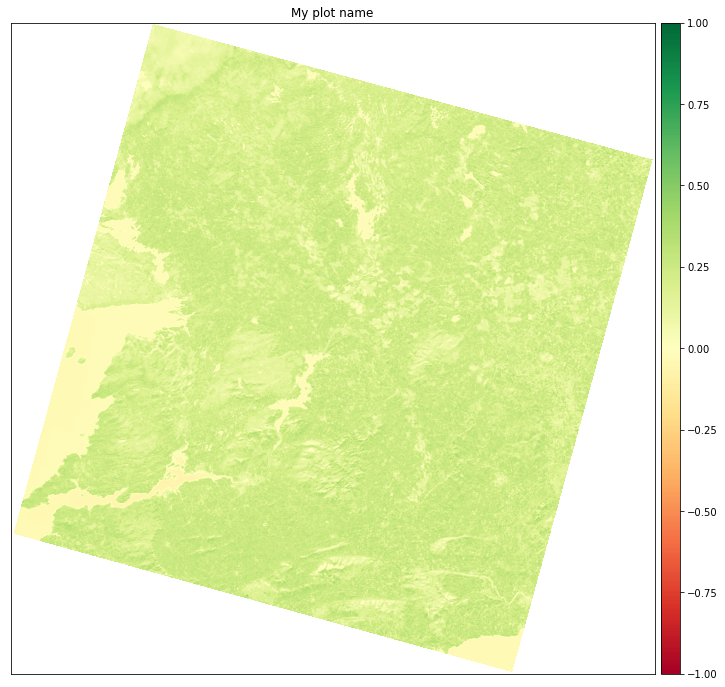

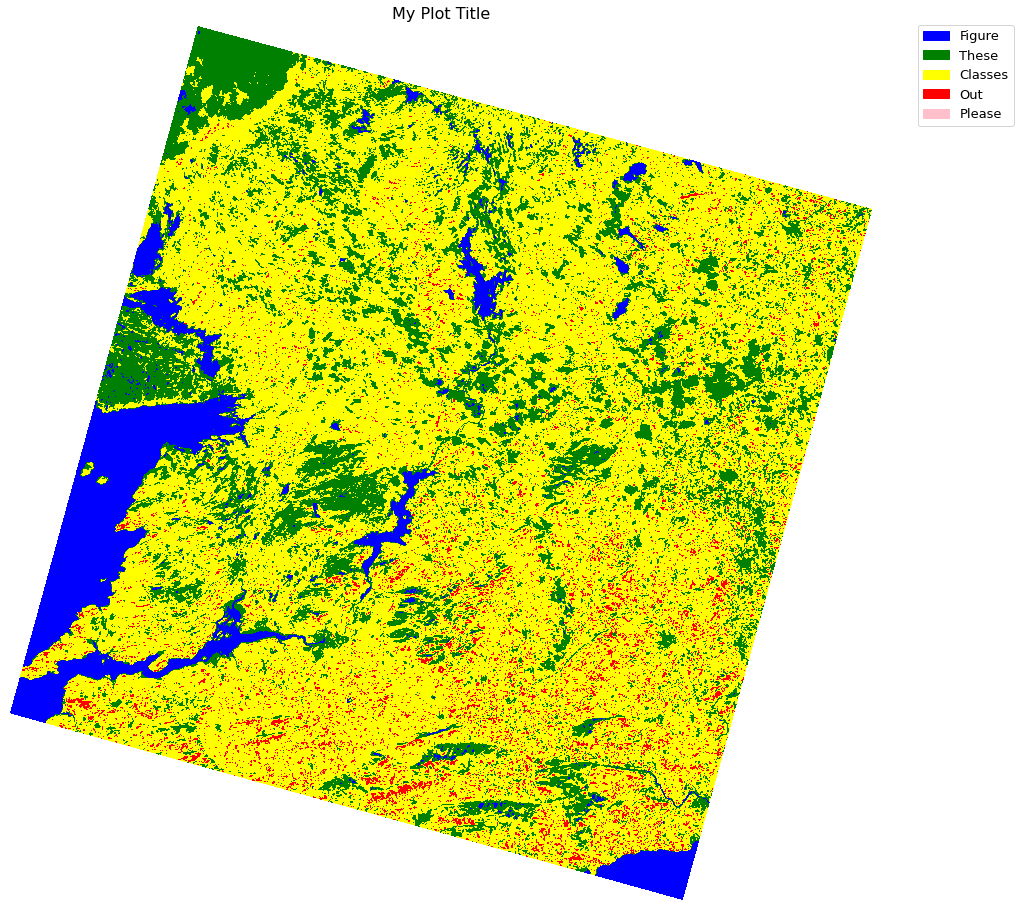

In [21]:
###run the function on your image. This will give you the plotted output for the NDVI.
ndvi(image)

In [22]:
###Function to calculate the ndvi based on the image that you open and stack, above.
def ndmi (image):
    ###Here we define the two bands used to calculate the NDVI: red band and near infrared (NIR) band
    ###These are changed to floats AND WHY IS THAT?
    nir = image[4].astype(float)
    swir = image[5].astype(float)
    ###and calculate the ndvi using the formula and numpy's divide function
    my_ndmi = np.divide((nir-swir), (nir+swir))
    
    #give your plot a name
    plot_title = ["My plot name"]
    
    ###Depending on your area of interest you might like to change vmin and vmax. 
    ###If, for example, your values range from -0.3 to 0.4, try using e.g. -0.4 and 0.5 as vmin/vmax to get a clearer 
    ###idea of the actual spread of NDVI values. As NDVI values can mathematically range from -1 to 1 these are used as 
    ###default vmin/vmax.
    ###Feel free to change the colour map, too. RdYlGn (continuous scale of red -> green) is a commonly used one 
    ###with NDVI's, where darker greens represent healthier vegetation. 
    ###Choose more here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ep.plot_bands(my_ndmi, cmap = "RdYlGn", title = plot_title, vmin = -1, vmax = 1)
    
    ###and create the classes you want on your ndvi. Edit these as you please. -np.inf and np.inf will take the negative
    ###and positive extremities. This will create 5 classes, but you can add more (just remember to assign them a colour below)
    ndmi_classes = [-np.inf, 0, 0.15, 0.3, 0.5, np.inf]
    ###Below we take the output array for our ndvi calculated above and give each value the integer value of the 
    ###class it falls into
    image_ndmi_class = np.digitize(my_ndmi, ndmi_classes)
    ### Apply a 'no data' mask to the array. This will remove no value data entries
    image_ndmi_class = np.ma.masked_where(np.ma.getmask(my_ndmi), image_ndmi_class)
    np.unique(image_ndmi_class)
    
    ###define colour map and class names
    ###turn colours list into a colourmap (cmp) to read into imshow, below.
    ndmi_colours = ["blue", "green", "yellow", "red", "pink"]
    ndmi_cmap = ListedColormap(ndmi_colours)
    ndmi_class_names = [
        "Figure",
        "These",
        "Out",
        "Please",
        "NOW"
    ]
    
    # Get list of classes from the masked array
    classes = np.unique(image_ndmi_class)
    classes = classes.tolist()
    ### The mask returns a value of 'NONE' as a class. This will give an error message that there are more classes (n+1) than
    ###colours in cmap (n). We can remove this. (The example in the function has n = 5 classes).
    classes = classes[0:5]

    # Plot your data. Customise aspects such as figure size and font size.
    fig, ax = plt.subplots(figsize=(14, 14))
    im = ax.imshow(image_ndmi_class, cmap=ndmi_cmap)

    ep.draw_legend(im_ax=im, classes=classes, titles=ndmi_class_names)
    ax.set_title(
        "My Plot Title",
        fontsize=16,
    )
    ax.set_axis_off()

    # Auto adjust subplot to fit figure size
    plt.tight_layout()
    
   
    

C:\Users\IconI\.conda\envs\assignment_env\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


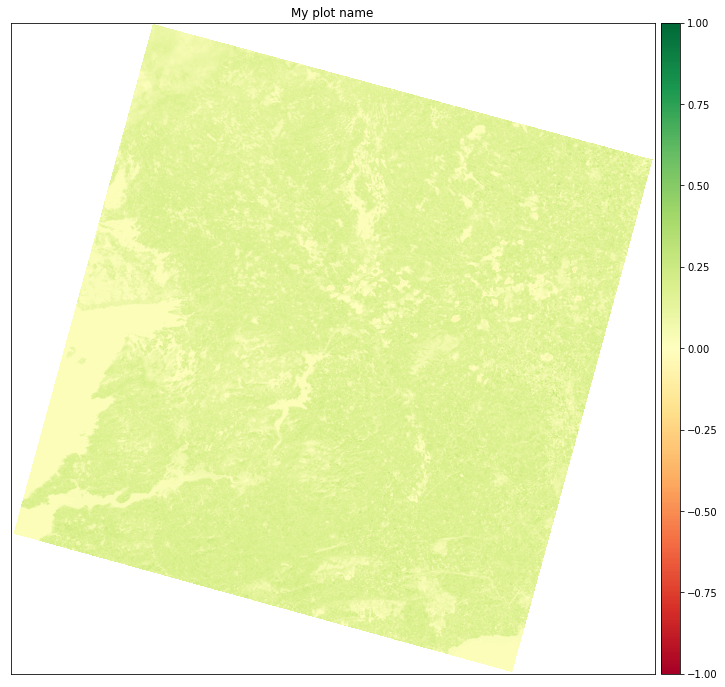

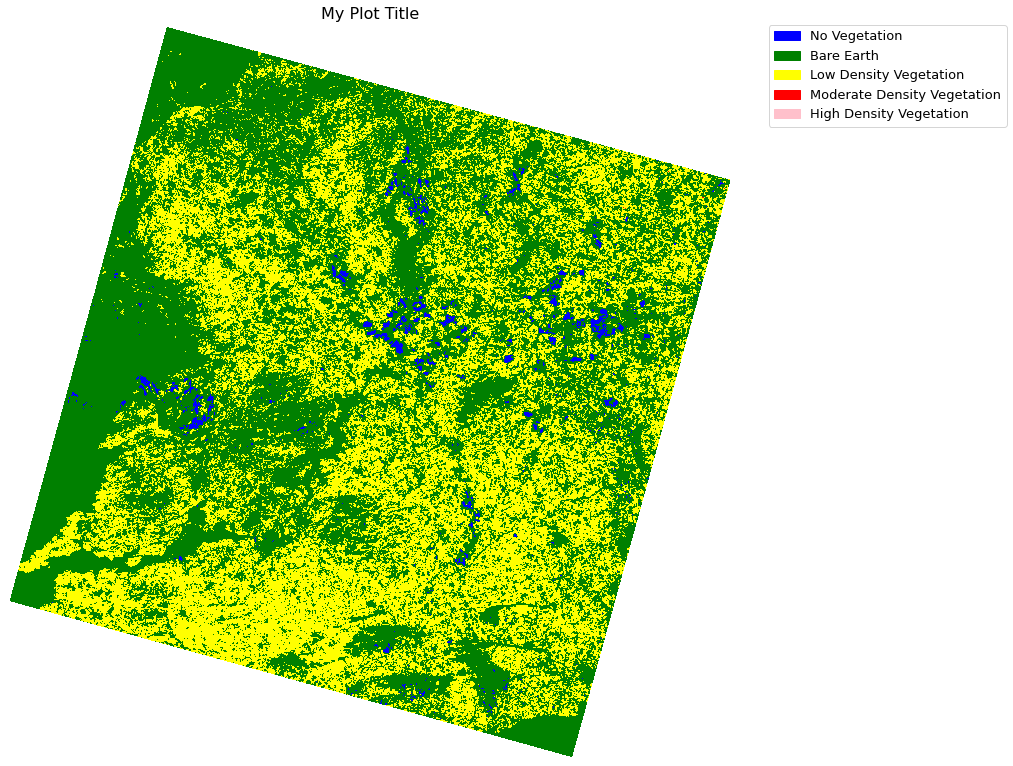

In [23]:
ndmi(image)
